In [1]:
#!pip install wordcloud
import os
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from collections import Counter
from wordcloud import WordCloud

In [2]:
def load_data(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                content = file.read()
                data.append(content)
    return data

directory = 'Articles' # Replace with the path to your text files
raw_data = load_data(directory)


In [4]:
def preprocess_data(raw_data):
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    preprocessed_data = []
    for document in raw_data:
        tokenized_words = word_tokenize(document.lower())
        cleaned_words = [word for word in tokenized_words if word.isalnum() and word not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
        preprocessed_data.append(lemmatized_words)
    return preprocessed_data

preprocessed_data = preprocess_data(raw_data)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...


In [5]:
preprocessed_data = ' '.join([' '.join(doc) for doc in preprocessed_data])

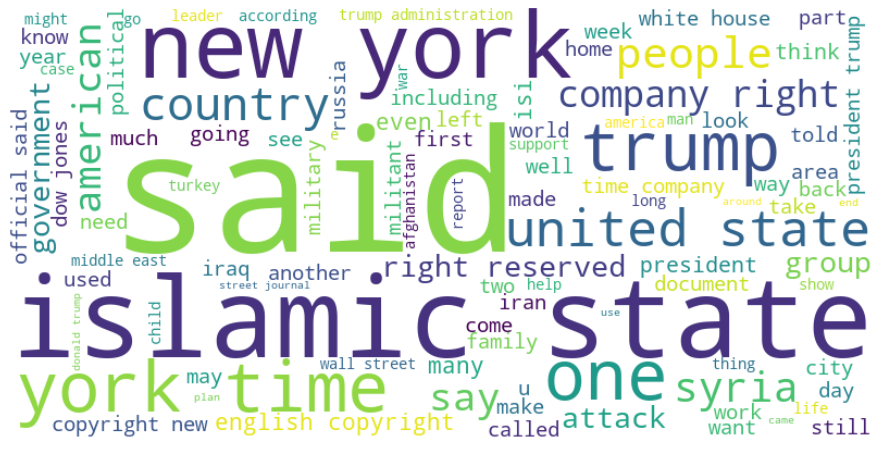

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, max_words=100):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words).generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_word_cloud(preprocessed_data)

## Meta data extraction

In [7]:
import re

def extract_metadata(text):
    metadata = {}
    # Extract metadata here (e.g., title, author, date, etc.)
    # Example: metadata['title'] = re.search('TITLE_PATTERN', text).group(1)
    
    # Remove metadata from the text
    cleaned_text = re.sub('METADATA_PATTERN', '', text)
    return metadata, cleaned_text

def preprocess_data(raw_data):
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    preprocessed_data = []
    metadata_list = []

    for document in raw_data:
        metadata, cleaned_text = extract_metadata(document)
        metadata_list.append(metadata)

        tokenized_words = word_tokenize(cleaned_text.lower())
        cleaned_words = [re.sub(r'[^\w\s]', '', word) for word in tokenized_words if word.isalnum() and word not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
        preprocessed_data.append(lemmatized_words)
    
    return metadata_list, preprocessed_data

metadata_list, preprocessed_data = preprocess_data(raw_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
dictionary = Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_data]

In [9]:
def print_features(corpus, dictionary, document_index=0, num_features=10):
    bow_doc = corpus[document_index]
    sorted_bow = sorted(bow_doc, key=lambda x: x[1], reverse=True)

    print(f"Top {num_features} words in document {document_index}:\nWord\tFrequency")
    for word_id, freq in sorted_bow[:num_features]:
        print(f"{dictionary[word_id]}\t{freq}")

print_features(corpus, dictionary, document_index=0, num_features=10)

Top 10 words in document 0:
Word	Frequency
state	114
obama	94
said	89
afghanistan	86
attack	60
american	57
islamic	56
new	55
war	54
president	52


In [10]:
for i in range(1, 18):
    print_features(corpus, dictionary, document_index=i, num_features=10)

Top 10 words in document 1:
Word	Frequency
said	779
new	532
state	520
time	456
one	370
york	332
islamic	323
people	311
trump	311
would	284
Top 10 words in document 2:
Word	Frequency
said	823
state	652
time	543
new	503
islamic	422
york	391
iraq	298
one	267
group	255
american	250
Top 10 words in document 3:
Word	Frequency
said	658
new	551
time	524
state	505
york	383
islamic	314
year	301
trump	296
one	279
people	269
Top 10 words in document 4:
Word	Frequency
said	798
trump	754
state	712
new	514
time	474
one	381
would	353
united	351
people	343
president	343
Top 10 words in document 5:
Word	Frequency
state	972
trump	845
said	815
new	545
united	514
islamic	476
time	445
american	403
president	399
order	374
Top 10 words in document 6:
Word	Frequency
state	895
trump	837
said	644
new	504
united	492
time	467
country	394
american	365
people	359
president	320
Top 10 words in document 7:
Word	Frequency
trump	840
said	762
state	739
syria	590
time	471
new	448
president	400
american	399
islamic	352
mil

In [11]:
from collections import defaultdict
import numpy as np

def print_summary(corpus, dictionary, num_features=10):
    word_freqs = defaultdict(int)
    doc_lengths = []

    for doc in corpus:
        doc_length = 0
        for word_id, freq in doc:
            word_freqs[word_id] += freq
            doc_length += freq
        doc_lengths.append(doc_length)

    sorted_word_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)

    print(f"Top {num_features} words across all documents:\nWord\tFrequency")
    for word_id, freq in sorted_word_freqs[:num_features]:
        print(f"{dictionary[word_id]}\t{freq}")

    print(f"\nAverage word frequency: {np.mean(list(word_freqs.values())):.2f}")
    print(f"Average document length: {np.mean(doc_lengths):.2f}")

print_summary(corpus, dictionary, num_features=10)


Top 10 words across all documents:
Word	Frequency
said	11692
state	10457
trump	7730
islamic	6289
new	6230
time	5932
president	4372
one	4283
american	4088
syria	4083

Average word frequency: 28.09
Average document length: 58956.06


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_words(corpus, dictionary, num_features=10):
    word_freqs = defaultdict(int)

    for doc in corpus:
        for word_id, freq in doc:
            word_freqs[word_id] += freq

    sorted_word_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
    top_words = [(dictionary[word_id], freq) for word_id, freq in sorted_word_freqs[:num_features]]

    return top_words


def get_doc_lengths(corpus):
    doc_lengths = []

    for doc in corpus:
        doc_length = 0
        for _, freq in doc:
            doc_length += freq
        doc_lengths.append(doc_length)

    return doc_lengths


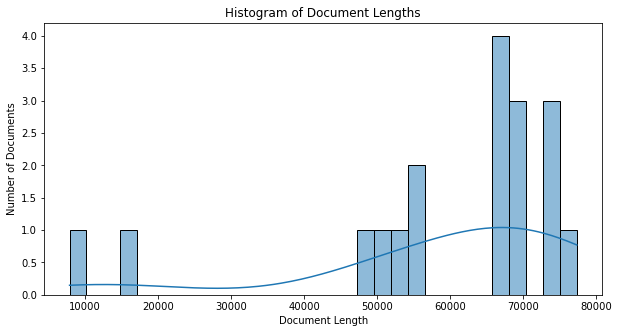

In [13]:
def plot_doc_lengths(corpus):
    doc_lengths = get_doc_lengths(corpus)

    plt.figure(figsize=(10, 5))
    sns.histplot(doc_lengths, kde=True, bins=30)
    plt.xlabel("Document Length")
    plt.ylabel("Number of Documents")
    plt.title("Histogram of Document Lengths")
    plt.show()

plot_doc_lengths(corpus)

## LDA

In [ ]:
from gensim.models import LdaModel
def train_lda(corpus, dictionary, num_topics=5, passes=10, random_state=42):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=random_state)
    return lda_model

